# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Ahcmad Ardhi Arridho]
- **Email:** [Ardhigt117@gmail.com]
- **ID Dicoding:** [ardhi_arridho]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan penyewaan sepeda di semua musim dalam tahun 2011 dan 2012?
- Musim apa yang menjadi musim dengan tingkat penyewa sepeda terbanyak?

## Import Semua Packages/Library yang Digunakan

In [199]:
# Mengimport seluruh library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


## Data Wrangling

### Gathering Data

In [172]:
# Mengimport dataset yang dibutuhkan
day_url = "https://raw.githubusercontent.com/Ardhi-17/air-quaility-dataset/main/Bike-sharing-dataset/day.csv"

day_df = pd.read_csv(day_url)

day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [173]:
# Mengimport dataset yang dibutuhkan
hour_url = "https://raw.githubusercontent.com/Ardhi-17/air-quaility-dataset/main/Bike-sharing-dataset/hour.csv"

hour_df = pd.read_csv(hour_url)

hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [174]:
# Memeriksa tipe data dari kedua dataset
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [175]:
# Mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [176]:
# Mengecek keberadaan missing value di dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [177]:
# Memeriksa duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [178]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [179]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam day_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [180]:
# Menghapus kolom yang tidak diperlukan.
# Kolom instant dan kolom workingday akan di hapus
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)
hour_df.drop(['instant'], axis = 1, inplace= True)
day_df.drop(['instant'], axis = 1, inplace= True)

In [181]:
# Mengganti tipe data dteday yang tadinya 'object' akan kita ubah menjadi 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [182]:
# Mengganti nama dari kolom agar lebih mudah dipahami
hour_df.rename(columns={'dteday':'date',
                        'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'holiday':'is_holiday',
                        'workingday':'is_working_day',
                        'weathersit':'weather_situation',
                        'temp':'temperature',
                        'atemp':'feels_like_temperature',
                        'hum':'humidity',
                        'casual':'casual',
                        'registered':'registered',
                        'cnt':'total_users'}, inplace=True)

day_df.rename(columns={'dteday':'date',
                        'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'holiday':'is_holiday',
                        'workingday':'is_working_day',
                        'weathersit':'weather_situation',
                        'temp':'temperature',
                        'atemp':'feels_like_temperature',
                        'hum':'humidity',
                        'casual':'casual',
                        'registered':'registered',
                        'cnt':'total_users'}, inplace=True)


# Check label
print(hour_df.info())
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    17379 non-null  datetime64[ns]
 1   season                  17379 non-null  int64         
 2   year                    17379 non-null  int64         
 3   month                   17379 non-null  int64         
 4   hour                    17379 non-null  int64         
 5   is_holiday              17379 non-null  int64         
 6   weekday                 17379 non-null  int64         
 7   weather_situation       17379 non-null  int64         
 8   temperature             17379 non-null  float64       
 9   feels_like_temperature  17379 non-null  float64       
 10  humidity                17379 non-null  float64       
 11  windspeed               17379 non-null  float64       
 12  casual                  17379 non-null  int64 

In [183]:
# Mengkonversi isi kolom agar mudah dipahami
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Good','Moderate','Bad','Worst'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Good','Moderate','Bad','Worst'), inplace=True)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Menghitung Kelembapan
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

# Memperbaiki satuan waktu
hour_df.hour.replace((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23),('12 am','01 am', '02 am', '03 am', '04 am', '05 am', '06 am', '07 am','08 am', '09 am', '10 am', '11 am', '12 pm', '01 pm', '02 pm','03 pm', '04 pm', '05 pm', '06 pm', '07 pm', '08 pm', '09 pm', '10 pm', '11 pm'), inplace=True)

# Check data
print(hour_df.head())
print(day_df.head())

        date  season  year month   hour  is_holiday   weekday  \
0 2011-01-01  Spring  2011   Jan  12 am           0  Saturday   
1 2011-01-01  Spring  2011   Jan  01 am           0  Saturday   
2 2011-01-01  Spring  2011   Jan  02 am           0  Saturday   
3 2011-01-01  Spring  2011   Jan  03 am           0  Saturday   
4 2011-01-01  Spring  2011   Jan  04 am           0  Saturday   

  weather_situation  temperature  feels_like_temperature  humidity  windspeed  \
0              Good         0.24                  0.2879      81.0        0.0   
1              Good         0.22                  0.2727      80.0        0.0   
2              Good         0.22                  0.2727      80.0        0.0   
3              Good         0.24                  0.2879      75.0        0.0   
4              Good         0.24                  0.2879      75.0        0.0   

   casual  registered  total_users  
0       3          13           16  
1       8          32           40  
2       5  

In [184]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(weekday):
    if weekday in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["weekday"].apply(get_category_days)
day_df["category_days"] = day_df["weekday"].apply(get_category_days)


In [185]:
# Mengganti tipe data menjadi kategori
hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['hour'] = hour_df['hour'].astype('category')
hour_df['is_holiday'] = hour_df['is_holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['weather_situation'] = hour_df['weather_situation'].astype('category')


In [186]:
# Check label
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    731 non-null    datetime64[ns]
 1   season                  731 non-null    object        
 2   year                    731 non-null    object        
 3   month                   731 non-null    object        
 4   is_holiday              731 non-null    int64         
 5   weekday                 731 non-null    object        
 6   weather_situation       731 non-null    object        
 7   temperature             731 non-null    float64       
 8   feels_like_temperature  731 non-null    float64       
 9   humidity                731 non-null    float64       
 10  windspeed               731 non-null    float64       
 11  casual                  731 non-null    int64         
 12  registered              731 non-null    int64     

## Exploratory Data Analysis (EDA)

### Explore ...

In [187]:
# melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

<ipython-input-187-50db742b9aad>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,date,season,year,month,hour,is_holiday,weekday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_users,category_days
count,17379,17379,17379,17379,17379,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,731,4,2,12,24,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2011-01-01 00:00:00,Fall,2012,Jul,04 pm,0.0,Saturday,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,24,4496,8734,1488,730,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192556,0.171850,19.292983,0.122340,49.305030,151.357286,181.387599,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN


In [188]:
# melihat rangkuman parameter statistik dari data hour_df
day_df.describe(include="all")

<ipython-input-188-7250d38db8c4>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,date,season,year,month,is_holiday,weekday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_users,category_days
count,731,731,731,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,731,4,2,12,NaN,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2011-01-01 00:00:00,Fall,2012,Jan,NaN,Saturday,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,1,188,366,62,NaN,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.028728,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN
std,NaN,NaN,NaN,NaN,0.167155,NaN,NaN,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN


In [189]:
# penyewaan berdasarkan jam
total_user_by_hour_df = hour_df.groupby(by=["hour"], observed=True).agg({
    "casual": "sum",
    "registered": "sum",
    "total_users": "sum"
}).sort_values(by='hour', ascending=False)
total_user_by_hour_df.head(25)

,casual,registered,total_users
hour,,,
12 pm,49718,134696,184414
12 am,7375,31755,39130
11 pm,11065,52876,63941
11 am,43286,108034,151320
10 pm,16200,79412,95612
10 am,33789,92468,126257
09 pm,20570,104875,125445
09 am,22458,136980,159438
08 pm,26378,138172,164550


In [190]:
# Penyewaan berdasarkan season
hour_df.groupby(by="season", observed=True).agg({
    "total_users": ["max", "min", "mean", "sum", "std"],
    "casual": ["max", "min", "mean", "sum", "std"],
    "registered": ["max", "min", "mean", "sum", "std"]
})


total_users                                      casual                 \
               max min        mean      sum         std    max min       mean   
season                                                                          
Spring         801   1  111.114569   471348  119.224010    367   0  14.290901   
Summer         957   1  208.344069   918589  188.362473    361   0  46.160581   
Fall           977   1  236.016237  1061129  197.711630    350   0  50.287144   
Winter         967   1  198.868856   841613  182.967972    362   0  30.666824   

                          registered                                      
           sum        std        max min        mean     sum         std  
season                                                                    
Spring   60622  27.463006        681   0   96.823668  410726  104.347605  
Summer  203522  57.455803        782   0  162.183488  715067  152.751493  
Fall    226091  51.751916        886   0  185.729093  835038  166.430156  
Winter  129782  46.034058        876   0  168.202032  711831  157.559340

In [191]:
hour_df.groupby(by="month", observed=True).agg({
    "total_users": ["max", "min", "mean", "sum", "std"]
})

total_users                                    
              max min        mean     sum         std
month                                                
Jan           559   1   94.424773  134933   99.907146
Feb           610   1  112.865026  151352  112.486565
Mar           957   1  155.410726  228920  163.543050
Apr           822   1  187.260960  269094  181.137902
May           873   1  222.907258  331686  187.721497
Jun           900   1  240.515278  346342  196.038950
Jul           913   1  231.819892  344948  187.483806
Aug           941   1  238.097627  351194  200.444648
Sep           977   1  240.773138  345991  214.609531
Oct           963   1  222.158511  322352  203.477057
Nov           729   1  177.335421  254831  158.973887
Dec           759   1  142.303439  211036  141.080674

In [192]:
hour_df.groupby(by="weather_situation", observed=True).agg({
    "total_users": ["max", "min", "mean", "sum", "std"]
})

total_users                                     
                          max min        mean      sum         std
weather_situation                                                 
Good                      977   1  204.869272  2338173  189.487773
Moderate                  957   1  175.165493   795952  165.431589
Bad                       891   1  111.579281   158331  133.781045
Worst                     164  23   74.333333      223   77.925178

In [193]:
total_user_by_season_every_year_df = hour_df.groupby(by=["season", "year"], observed=True).agg({
    "casual": "sum",
    "registered": "sum",
    "total_users": "sum"
})
total_user_by_season_every_year_df.head(8)

casual  registered  total_users
season year                                 
Spring 2011   21425      128575       150000
       2012   39197      282151       321348
Summer 2011   77564      269752       347316
       2012  125958      445315       571273
Fall   2011   95450      324200       419650
       2012  130641      510838       641479
Winter 2011   52813      273324       326137
       2012   76969      438507       515476

## Visualization & Explanatory Analysis

### Pertanyaan 1:

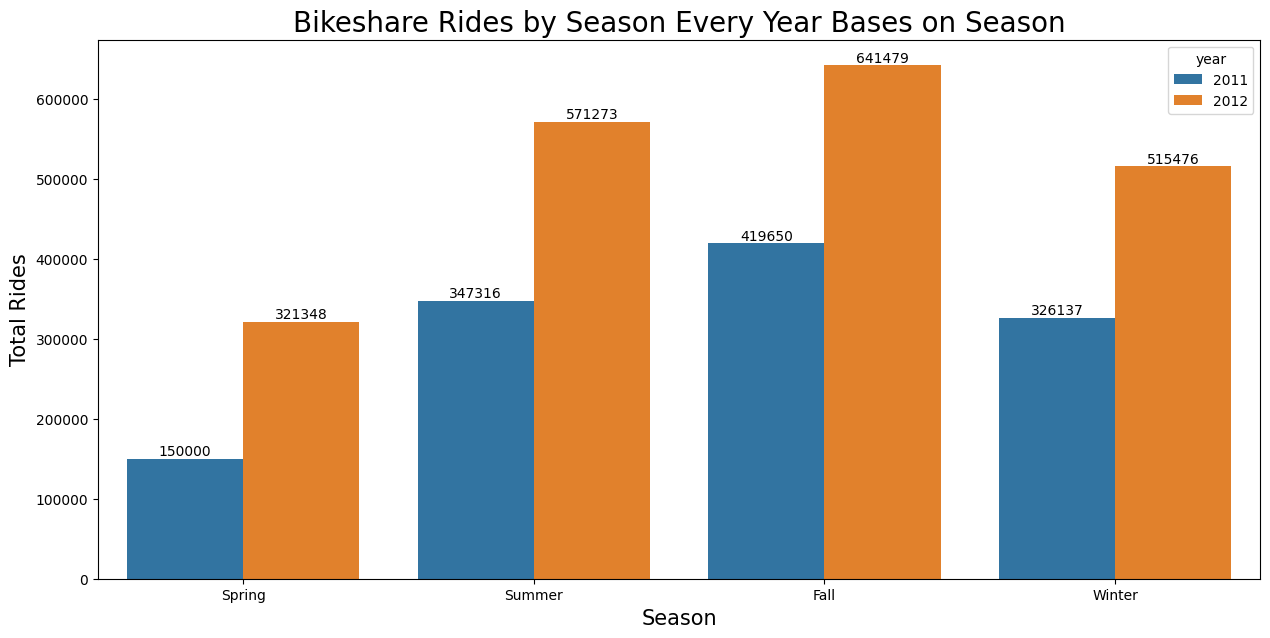

In [194]:
# Menampilkan penyewaan sepeda untuk setiap tahunnya
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(data=total_user_by_season_every_year_df, x="season", y="total_users", hue="year", errorbar=None, order=season_order, ax=ax)

for i in ax.containers:
    ax.bar_label(i,fontsize=10)

plt.title("Bikeshare Rides by Season Every Year Bases on Season", size=20)
plt.xlabel("Season", size=15)
plt.ylabel("Total Rides", size=15)
plt.show()

Pada tahun 2012, terdapat peningkatan signifikan dalam jumlah penyewaan sepeda jika dibandingkan dengan musim yang sama pada tahun 2011. Musim gugur (Fall) menjadi periode dengan jumlah penyewaan tertinggi pada tahun 2011 dan 2012, mencapai 419.650 dan 641.479 penyewaan, secara berturut-turut. Sebaliknya, musim semi (Spring) menjadi musim dengan jumlah penyewaan terendah pada kedua tahun tersebut, dengan jumlah penyewaan masing-masing sebanyak 150.000 dan 321.348.

### Pertanyaan 2:

<ipython-input-195-ae463aa2004d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


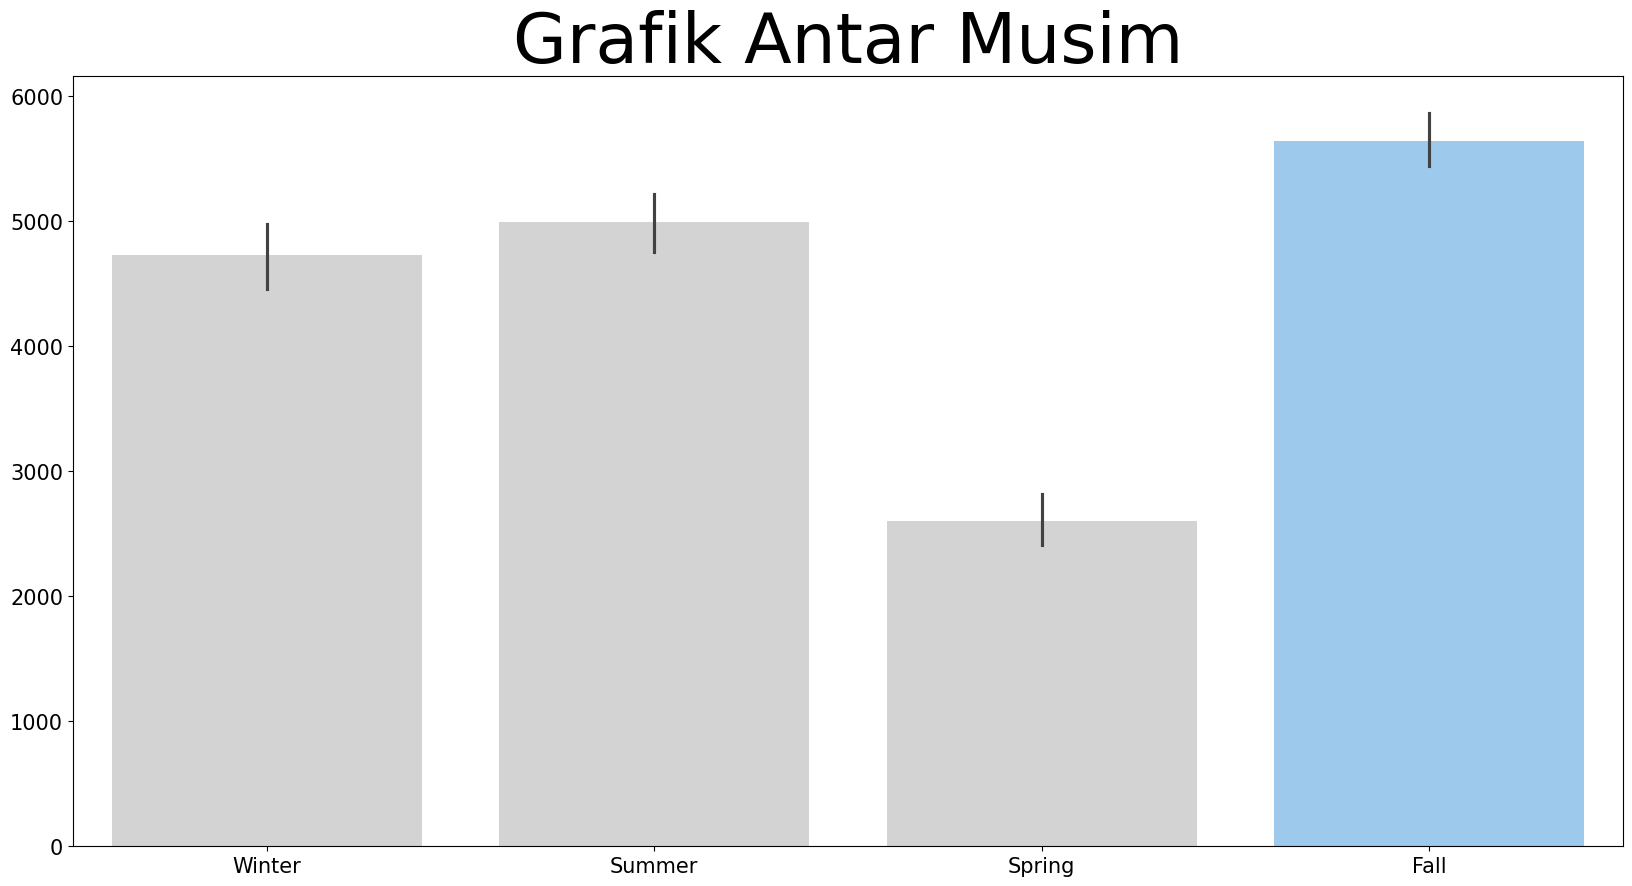

In [195]:
# mengatur warna
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="total_users" dan x="season", menggunakan data=day_df
sns.barplot(
        y="total_users",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=)

# menampilkan plot
plt.show()


Jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (Fall), dengan total mencapai 1.061.129 penyewaan.

- Kesimpulan pertanyaan 1

Tahun 2012, penyewaan sepedea meningkat dibanding di tahun 2011 dan hal ini terjadi di setiap musim pada tahun tersebut.
---

- Kesimpulan pertanyaan 2

Musim gugur menjadi musim dengan tingkat penyewaan tertinggi.

# TEKNIK CLUSTERING

Total penyewaan yang terdaftar berdasarkan bulan

In [197]:
hour_df.groupby(by="month").registered.nunique().sort_values(ascending=False)

month
Sep    497
Aug    492
Oct    481
Jun    477
Jul    463
May    458
Apr    430
Nov    423
Dec    395
Mar    388
Feb    310
Jan    297
Name: registered, dtype: int64

In [198]:
hour_df.groupby(by="weekday").registered.nunique().sort_values(ascending=False)

weekday
Wednesday    572
Thursday     567
Tuesday      567
Monday       533
Friday       528
Saturday     406
Sunday       401
Name: registered, dtype: int64

# TIME SERIES ANALYSIS

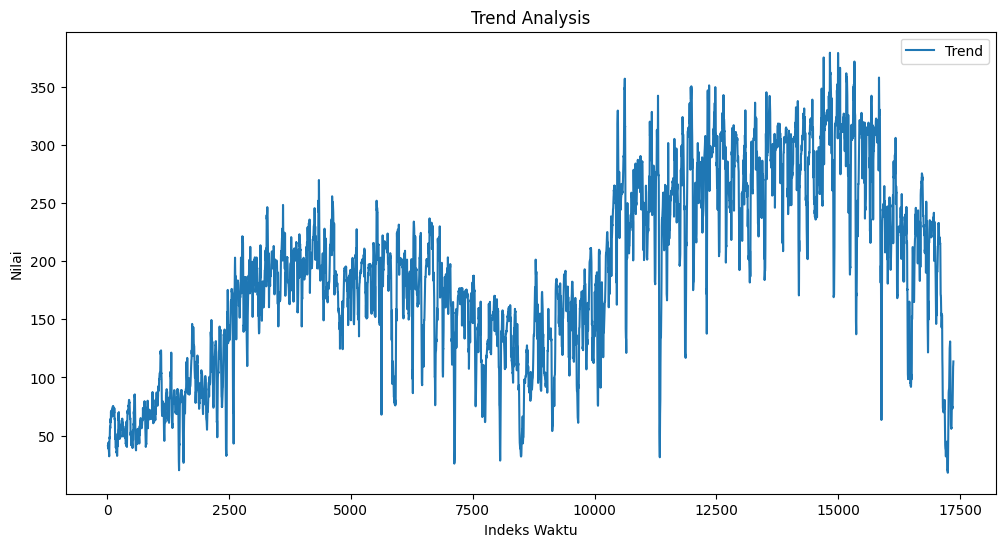

In [208]:
# Dekomposisi time series
period = 24  # Sesuaikan dengan siklus 2 tahun
decomposition = sm.tsa.seasonal_decompose(hour_df['total_users'], model='additive', period=period)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualisasi Trend
plt.figure(figsize=(12, 6))
plt.plot(trend, label='Trend')
plt.title('Trend Analysis')
plt.xlabel('Indeks Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.show()



In [209]:
# Menyimpan DataFrame hour_df ke dalam file CSV
hour_df.to_csv("hour_data.csv", index=False)

# Menyimpan DataFrame day_df ke dalam file CSV
day_df.to_csv("day_data.csv", index=False)
